### -------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Data Preprocessing using Pipeline in Pandas

### -------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Pipe function
- a **Pandas built-in function**
- used to **combine and execute multiple functions into a single pipeline by passing the result of the previous function to the next one in the chain**
- applies **chainable functions that expect Series or DataFrames**
      pandas.DataFrame.pipe
      DataFrame.pipe(func, *args, **kwargs)
-  general **syntax**:

        final_dataset = (original_data
                        pipe(first_function, "single_column").
                        pipe(second_function, "[col1, ...colN]").
                        pipe(third_function, ).
                        ...
                        pipe(my_nth_function)
                        )

       where:
          - final_dateset - Final preprocessed dataset after applying all the functions
          - original_data - Raw dataset
          - pipe(first_function, "single_column") - means that first_function needs single_column to complete the task
          - pipe(second_function, "[col1, ..., colN]") - means that second_function needs [col1, ..., colN] to complete the task
          - pipe(third_function,) - means that there is no need to specify the column name
- **link to Pipe** function: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pipe.html         

### -------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Project Objective: Use Pandas Pipe for multiple functions chaining

Create a model that applies chainable functions to preprocess data from created dataset.

### -------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 1. Import the Libraries

In [1]:
# Impoet sys
import sys

# Import Numpy, Pandas, Matplotlib and Seaborn libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Create the Dataset

In [2]:
candidates= {
    'Full_name': ["Jovanovski, Jovan", "Biljanovska, Biljana", "Nikolovski, Nikola", "Damjanovski, Damjan", "Aleksandrovska, Aleksandra", "Simonovska, Simona", "Biljanovska, Biljana"],
    'Degree': ["Master", "Master", "Bachelor", "PhD", "Master", "PhD", "Master"],
    'City': ["Skopje", "Bitola", "Prilep", "Ohrid", "Strumica", "Kocani", "Bitola"],
    'Application_date': ['11/17/2022', '09/23/2022', '12/2/2021', '08/25/2022', '01/07/2022', '12/26/2022', '09/23/2022'],
    'From_office_(min)': [np.nan, 95, 75, np.nan, 100, 34, 95]
          }

- **Full_name** - Full name of the candidate
- **Degree** - Candidate’s degree during the application
- **City** - Where the candidate is from
- **Application_date** - When the candidate applied for the position
- **From_office_(min)** - Commute time (in minutes) to the company’s offices in the candidate’s local city

In [3]:
candidates_df = pd.DataFrame(candidates)

In [4]:
candidates_df

,Full_name,Degree,City,Application_date,From_office_(min)
0,"Jovanovski, Jovan",Master,Skopje,11/17/2022,NaN
1,"Biljanovska, Biljana",Master,Bitola,09/23/2022,95.0
2,"Nikolovski, Nikola",Bachelor,Prilep,12/2/2021,75.0
3,"Damjanovski, Damjan",PhD,Ohrid,08/25/2022,NaN
4,"Aleksandrovska, Aleksandra",Master,Strumica,01/07/2022,100.0
5,"Simonovska, Simona",PhD,Kocani,12/26/2022,34.0
6,"Biljanovska, Biljana",Master,Bitola,09/23/2022,95.0


In [5]:
# Convert a scalar, array-like, Series or DataFrame/dict-like to a pandas datetime object
candidates_df['Application_date'] = pd.to_datetime(candidates_df["Application_date"])

In [6]:
candidates_df

,Full_name,Degree,City,Application_date,From_office_(min)
0,"Jovanovski, Jovan",Master,Skopje,2022-11-17,NaN
1,"Biljanovska, Biljana",Master,Bitola,2022-09-23,95.0
2,"Nikolovski, Nikola",Bachelor,Prilep,2021-12-02,75.0
3,"Damjanovski, Damjan",PhD,Ohrid,2022-08-25,NaN
4,"Aleksandrovska, Aleksandra",Master,Strumica,2022-01-07,100.0
5,"Simonovska, Simona",PhD,Kocani,2022-12-26,34.0
6,"Biljanovska, Biljana",Master,Bitola,2022-09-23,95.0


## 3. Data Preprocessing

#### Data Preprocessing:
- drop the columns (features) and rows (observations) with missing values
- fill in the missing values in columns and rows
- drop the columns which are of no significance and cannot provide any insight into the dataset
- extracting the Date
- convert to a Dummy variable feature using One-hot coding
- remove erroneous values
- redundant data
- nullify the impact of outliers
- etc.

### 3.1 Dealing with Missing values

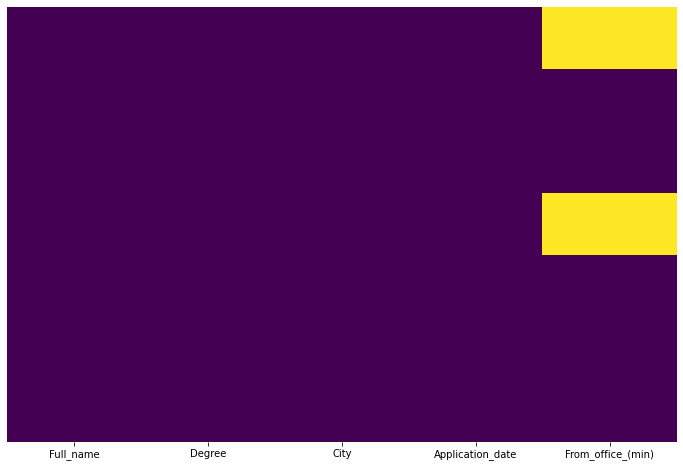

In [7]:
# Set up of the graphic area size
plt.figure(figsize=(12, 8))

# Display (plot) the missing values
sns.heatmap(data=candidates_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
# Total count of missing (null) values for each column and sort them in ascending order
candidates_df.isnull().sum().sort_values(ascending = False)

From_office_(min)    2
Full_name            0
Degree               0
City                 0
Application_date     0
dtype: int64

In [9]:
# Total count of missing (null) values for each column in % of the total DataFrame and sort them in ascending order
candidates_df.isnull().mean().sort_values(ascending = False)*100

From_office_(min)    28.571429
Full_name             0.000000
Degree                0.000000
City                  0.000000
Application_date      0.000000
dtype: float64

In [10]:
def fill_missing_values(df):
   for col in df.select_dtypes(include= ["int","float"]).columns:
      val = df[col].mean()
      df[col].fillna(val, inplace=True)
   return df

In [11]:
missing_values = fill_missing_values(candidates_df)

In [12]:
missing_values

,Full_name,Degree,City,Application_date,From_office_(min)
0,"Jovanovski, Jovan",Master,Skopje,2022-11-17,79.8
1,"Biljanovska, Biljana",Master,Bitola,2022-09-23,95.0
2,"Nikolovski, Nikola",Bachelor,Prilep,2021-12-02,75.0
3,"Damjanovski, Damjan",PhD,Ohrid,2022-08-25,79.8
4,"Aleksandrovska, Aleksandra",Master,Strumica,2022-01-07,100.0
5,"Simonovska, Simona",PhD,Kocani,2022-12-26,34.0
6,"Biljanovska, Biljana",Master,Bitola,2022-09-23,95.0


### 3.2 Drop the duplicate values

In [13]:
def drop_duplicates(df, column_name):
   df = df.drop_duplicates(subset=column_name)
   return df

In [14]:
duplicates = drop_duplicates(candidates_df, "Full_name")

In [15]:
duplicates

,Full_name,Degree,City,Application_date,From_office_(min)
0,"Jovanovski, Jovan",Master,Skopje,2022-11-17,79.8
1,"Biljanovska, Biljana",Master,Bitola,2022-09-23,95.0
2,"Nikolovski, Nikola",Bachelor,Prilep,2021-12-02,75.0
3,"Damjanovski, Damjan",PhD,Ohrid,2022-08-25,79.8
4,"Aleksandrovska, Aleksandra",Master,Strumica,2022-01-07,100.0
5,"Simonovska, Simona",PhD,Kocani,2022-12-26,34.0


### 3.3 Remove the outliers

In [16]:
def remove_outliers(df, column_name):
  avg = df[column_name].mean()
  std = df[column_name].std()
  low_bound = avg - 2 * std
  high_bound = avg + 2 * std
  df = df[df[column_name].between(low_bound, high_bound, inclusive=True)]
  return df

In [17]:
outliers = remove_outliers(candidates_df, "From_office_(min)")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  


In [18]:
outliers

,Full_name,Degree,City,Application_date,From_office_(min)
0,"Jovanovski, Jovan",Master,Skopje,2022-11-17,79.8
1,"Biljanovska, Biljana",Master,Bitola,2022-09-23,95.0
2,"Nikolovski, Nikola",Bachelor,Prilep,2021-12-02,75.0
3,"Damjanovski, Damjan",PhD,Ohrid,2022-08-25,79.8
4,"Aleksandrovska, Aleksandra",Master,Strumica,2022-01-07,100.0
6,"Biljanovska, Biljana",Master,Bitola,2022-09-23,95.0


### 3.4 Convert column name to uppercase

In [19]:
# function to convert to uppercase
def uppercase_column_name(df):
   
    # Converts all the column names into uppercase
    df.columns = df.columns.str.upper()
     
    # And returns them
    return df 

In [20]:
uppercase = uppercase_column_name(candidates_df)

In [21]:
uppercase

,FULL_NAME,DEGREE,CITY,APPLICATION_DATE,FROM_OFFICE_(MIN)
0,"Jovanovski, Jovan",Master,Skopje,2022-11-17,79.8
1,"Biljanovska, Biljana",Master,Bitola,2022-09-23,95.0
2,"Nikolovski, Nikola",Bachelor,Prilep,2021-12-02,75.0
3,"Damjanovski, Damjan",PhD,Ohrid,2022-08-25,79.8
4,"Aleksandrovska, Aleksandra",Master,Strumica,2022-01-07,100.0
5,"Simonovska, Simona",PhD,Kocani,2022-12-26,34.0
6,"Biljanovska, Biljana",Master,Bitola,2022-09-23,95.0


### 3.5 Change the format of the First and Last names from the Full name column

In [22]:
def get_first_last_name(df, column_name):

  final_df = df.copy()

  splited_full_name = final_df[column_name].str.split(",", expand=True)

  final_df["First name"] = splited_full_name.get(0)
  final_df["Last name"] = splited_full_name.get(1)

  return final_df

In [23]:
first_last_name = get_first_last_name(candidates_df, "FULL_NAME")

In [24]:
first_last_name

,FULL_NAME,DEGREE,CITY,APPLICATION_DATE,FROM_OFFICE_(MIN),First name,Last name
0,"Jovanovski, Jovan",Master,Skopje,2022-11-17,79.8,Jovanovski,Jovan
1,"Biljanovska, Biljana",Master,Bitola,2022-09-23,95.0,Biljanovska,Biljana
2,"Nikolovski, Nikola",Bachelor,Prilep,2021-12-02,75.0,Nikolovski,Nikola
3,"Damjanovski, Damjan",PhD,Ohrid,2022-08-25,79.8,Damjanovski,Damjan
4,"Aleksandrovska, Aleksandra",Master,Strumica,2022-01-07,100.0,Aleksandrovska,Aleksandra
5,"Simonovska, Simona",PhD,Kocani,2022-12-26,34.0,Simonovska,Simona
6,"Biljanovska, Biljana",Master,Bitola,2022-09-23,95.0,Biljanovska,Biljana


### 3.6 Get the day, the month, the year, the day of the week, and the month of the year from the application date

In [25]:
def get_application_date_info(df, column_name):

  application_date = df[column_name]

  final_df = df.copy()

  final_df["Day"] = application_date.dt.day 
  final_df["Month"] = application_date.dt.month 
  final_df["Year"] = application_date.dt.year 
  final_df["Day of week"] = application_date.dt.day_name()
  final_df["Month of year"] = application_date.dt.month_name()

  return final_df

In [26]:
# Apply the function
application_date_info = get_application_date_info(candidates_df, "APPLICATION_DATE")

In [27]:
application_date_info

,FULL_NAME,DEGREE,CITY,APPLICATION_DATE,FROM_OFFICE_(MIN),Day,Month,Year,Day of week,Month of year
0,"Jovanovski, Jovan",Master,Skopje,2022-11-17,79.8,17,11,2022,Thursday,November
1,"Biljanovska, Biljana",Master,Bitola,2022-09-23,95.0,23,9,2022,Friday,September
2,"Nikolovski, Nikola",Bachelor,Prilep,2021-12-02,75.0,2,12,2021,Thursday,December
3,"Damjanovski, Damjan",PhD,Ohrid,2022-08-25,79.8,25,8,2022,Thursday,August
4,"Aleksandrovska, Aleksandra",Master,Strumica,2022-01-07,100.0,7,1,2022,Friday,January
5,"Simonovska, Simona",PhD,Kocani,2022-12-26,34.0,26,12,2022,Monday,December
6,"Biljanovska, Biljana",Master,Bitola,2022-09-23,95.0,23,9,2022,Friday,September


### 3.7 Create textual information

In [28]:
def info_by_row(row):

  # Select columns of interest 
  full_name = row.FULL_NAME.replace(",", " ")
  is_from = row.CITY
  degree = row.DEGREE
  from_office = row["FROM_OFFICE_(MIN)"]

  # Generate the description from previous variables
  # in format: 'Full name' from 'City' holds a 'Degree' degree and lives 'From office (min)' from the office
  info = f"""{full_name} from {is_from} holds a {degree} degree and lives {from_office} from the office"""

  return info

In [29]:
# Create the textual info
def candidate_info(df):

  final_df = df.copy()

  final_df["Textual_info"] = final_df.apply(lambda row: info_by_row(row), axis=1)

  return final_df

In [30]:
# Apply the function
textual_info = candidate_info(candidates_df)

In [31]:
textual_info

,FULL_NAME,DEGREE,CITY,APPLICATION_DATE,FROM_OFFICE_(MIN),Textual_info
0,"Jovanovski, Jovan",Master,Skopje,2022-11-17,79.8,Jovanovski Jovan from Skopje holds a Master d...
1,"Biljanovska, Biljana",Master,Bitola,2022-09-23,95.0,Biljanovska Biljana from Bitola holds a Maste...
2,"Nikolovski, Nikola",Bachelor,Prilep,2021-12-02,75.0,Nikolovski Nikola from Prilep holds a Bachelo...
3,"Damjanovski, Damjan",PhD,Ohrid,2022-08-25,79.8,Damjanovski Damjan from Ohrid holds a PhD deg...
4,"Aleksandrovska, Aleksandra",Master,Strumica,2022-01-07,100.0,Aleksandrovska Aleksandra from Strumica holds...
5,"Simonovska, Simona",PhD,Kocani,2022-12-26,34.0,Simonovska Simona from Kocani holds a PhD deg...
6,"Biljanovska, Biljana",Master,Bitola,2022-09-23,95.0,Biljanovska Biljana from Bitola holds a Maste...


## 4. Functions chaining with Pipe

In [32]:
# Create the Pipe by using calling all the functions
preprocessed_candidates = (candidates_df.
                            pipe(fill_missing_values).
                            pipe(drop_duplicates, "FULL_NAME").
                            pipe(remove_outliers, "FROM_OFFICE_(MIN)").
                            pipe(uppercase_column_name).
                            pipe(get_first_last_name, "FULL_NAME").
                            pipe(get_application_date_info, "APPLICATION_DATE").
                            pipe(candidate_info))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  


In [33]:
# Show the final result
preprocessed_candidates

,FULL_NAME,DEGREE,CITY,APPLICATION_DATE,FROM_OFFICE_(MIN),First name,Last name,Day,Month,Year,Day of week,Month of year,Textual_info
0,"Jovanovski, Jovan",Master,Skopje,2022-11-17,79.8,Jovanovski,Jovan,17,11,2022,Thursday,November,Jovanovski Jovan from Skopje holds a Master d...
1,"Biljanovska, Biljana",Master,Bitola,2022-09-23,95.0,Biljanovska,Biljana,23,9,2022,Friday,September,Biljanovska Biljana from Bitola holds a Maste...
2,"Nikolovski, Nikola",Bachelor,Prilep,2021-12-02,75.0,Nikolovski,Nikola,2,12,2021,Thursday,December,Nikolovski Nikola from Prilep holds a Bachelo...
3,"Damjanovski, Damjan",PhD,Ohrid,2022-08-25,79.8,Damjanovski,Damjan,25,8,2022,Thursday,August,Damjanovski Damjan from Ohrid holds a PhD deg...
4,"Aleksandrovska, Aleksandra",Master,Strumica,2022-01-07,100.0,Aleksandrovska,Aleksandra,7,1,2022,Friday,January,Aleksandrovska Aleksandra from Strumica holds...
5,"Simonovska, Simona",PhD,Kocani,2022-12-26,34.0,Simonovska,Simona,26,12,2022,Monday,December,Simonovska Simona from Kocani holds a PhD deg...
